# Connected Components

The purpose of this assignment is to familiarize yourself with the handling of graph data structures. You will implement depth-first search for identifying the connected components of an undirected graph, implementing procedure Search as a subroutine along the way.

You will use the [NetworkX](https://networkx.github.io/) Python package to represent and manipulate graphs. You should first familiarize yourself with its functionality by going through the brief [tutorial](http://networkx.github.io/documentation/networkx-1.9.1/tutorial/index.html). For this homework, you may only use the basic undirected graph methods listed [here](http://networkx.github.io/documentation/networkx-1.9.1/reference/classes.graph.html).

As a use case, we will work with a dataset recording the interactions between characters in Homer's *Iliad*.

The following code should now correctly create the graph.

In [6]:
import networkx as nx
import matplotlib as plt
import numpy as np
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2,{'weight':1}),(1,3,{'weight':2}),(1,6,{'weight':1}),(1,7,{'weight':4}),(2,4,{'weight':2}) ,
                 (2,3,{'weight':1}),(3,5,{'weight':3}),(4,8,{'weight':3}),(5,8,{'weight':1}),(6,8,{'weight':10}),
                 (7,8,{'weight':1})])

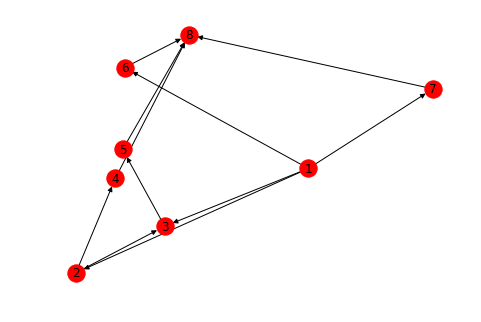

In [13]:
nx.draw(G, with_labels=True)

In [56]:
def dijkstra_shortest_edges(graph, start, end):
    # TODO: implement function
    all_nodes = G.nodes().keys()
    
    ###value will store previous node, cost to get to that node and how many edges it took to get to that node
    d = {'key':'value'}
    ###S contains nodes that we have added into our shortest path set
    S = []
    S.append(start)
    
    ###initialize 
    d[start] = [None,0,0]
    while len(S) != len(all_nodes):
        if(d.get(end) is not None):
            break
        ####check the nodes in S and its neighbors
        min_u = np.inf
        min_node = None
        source = None
        for u in S:
            for v in graph[u]:
                if d.get(v) is not None:
                    continue
                #### calculate costs and if there is a lesser cost vertice to go to, then go to that one
                if (d.get(u)[1] +graph[u][v]['weight']) < min_u:
                    min_u = d.get(u)[1]+graph[u][v]['weight']
                    source = u
                    min_node = v
                    min_edges = d.get(u)[2]
                ### if we find a vertice that can get to the min_u and min_node at lesser steps, then take that one
                if ((d.get(u)[1] +graph[u][v]['weight']) == min_u & d.get(u)[2] < min_edges):
                    source = u
                    min_node = v
                    min_edges = d.get(u)[2]

        d[min_node]= [source,min_u,min_edges+1]
        S.append(min_node)
    return reconcile_shortest_path(d,end)

In [50]:
def reconcile_shortest_path(D,node):
    if D.get(node)[0] is None: 
        print(node)
    else: 
        print(node)
        reconcile_shortest_path(D,D.get(node)[0])

In [44]:
reconcile_shortest_path()

TypeError: reconcile_shortest_path() takes exactly 2 arguments (0 given)

In [57]:
dijkstra_shortest_edges(G, 1, 8)

8
7
1
